In [ ]:
pip install yfinance

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

In [ ]:
ticker = "AAPL"
start_date = "2019-04-23"
end_date = "2024-04-22"

data = yf.download(ticker, start=start_date, end=end_date, progress=False)
data.reset_index(inplace=True)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-23,51.107498,51.937500,50.974998,51.869999,49.935200,93292000
1,2019-04-24,51.840000,52.119999,51.762501,51.790001,49.858177,70162400
2,2019-04-25,51.707500,51.939999,51.279999,51.320000,49.405712,74172800
3,2019-04-26,51.224998,51.250000,50.529999,51.075001,49.169846,74596400
4,2019-04-29,51.099998,51.492500,50.965000,51.152500,49.244465,88818800
5,2019-04-30,50.764999,50.849998,49.777500,50.167500,48.296200,186139600
6,2019-05-01,52.470001,53.827499,52.307499,52.630001,50.666832,259309200
7,2019-05-02,52.459999,53.162498,52.032501,52.287498,50.337116,127985200
8,2019-05-03,52.722500,52.959999,52.557499,52.937500,50.962864,83569600
9,2019-05-06,51.072498,52.209999,50.875000,52.119999,50.175854,129772400


In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                       open=data["Open"],
                                       high=data["High"],
                                       low=data["Low"],
                                       close=data["Close"])])

figure.update_layout(title="Apple Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
# Preprocessing
x = data[["Open", "High", "Low", "Adj Close", "Volume"]]
y = data["Close"]
x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(xtrain, ytrain, batch_size=1, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10
1006/1006 [==============================] - 11s 11ms/step - loss: 43.2463 - val_loss: 1.5371
Epoch 2/10
1006/1006 [==============================] - 12s 12ms/step - loss: 8.8712 - val_loss: 2.2747
Epoch 3/10
1006/1006 [==============================] - 13s 13ms/step - loss: 9.0198 - val_loss: 7.1016
Epoch 4/10
1006/1006 [==============================] - 13s 13ms/step - loss: 6.7475 - val_loss: 15.5579
Epoch 5/10
1006/1006 [==============================] - 12s 12ms/step - loss: 8.8422 - val_loss: 2.5296
Epoch 6/10
1006/1006 [==============================] - 13s 13ms/step - loss: 12.6738 - val_loss: 3.0160
Epoch 7/10
1006/1006 [==============================] - 13s 13ms/step - loss: 6.9137 - val_loss: 1.4210
Epoch 8/10
1006/1006 [==============================] - 13s 13ms/step - loss: 4.0835 - val_loss: 7.0696
Epoch 9/10
1006/1006 [==============================] - 20s 20ms/step - loss: 8.2535 - val_loss: 13.0435
Epoch 10/10
1006/1006 [==============================] - 12s

In [ ]:
test_loss = history.history['val_loss'][-1]
print("Test Loss:", test_loss)

Test Loss: 1.1211360692977905


In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_list = list(epochs)

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs_list, y=training_loss, mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=epochs_list, y=validation_loss, mode='lines', name='Validation Loss'))
fig.update_layout(title='Training and Validation Loss',
                  xaxis_title='Epochs',
                  yaxis_title='Loss')
fig.show()

In [ ]:
# Generate dates for the next 60 days
prediction_dates = pd.date_range(start=end_date, periods=60, freq='B').strftime("%Y-%m-%d")

# Prepare the input data for prediction
last_data_point = data.iloc[-1][["Open", "High", "Low", "Adj Close", "Volume"]].values.astype(np.float32).reshape(1, -1, 1)

# Predict the next 60 days
predicted_prices = []
for _ in range(60):
    prediction = model.predict(last_data_point)
    predicted_prices.append(prediction[0][0])
    last_data_point = np.append(last_data_point[:, 1:, :], prediction).reshape(1, -1, 1)

# Create a DataFrame for the predicted prices
predicted_data = pd.DataFrame(data=predicted_prices, index=prediction_dates, columns=["Predicted Close"])

# Display the predicted prices
print(predicted_data)

1/1 [==============================] - 0s 26ms/step
            Predicted Close
2024-04-22       167.923340
2024-04-23       148.664917
2024-04-24       119.105965
2024-04-25        63.491688
2024-04-26        11.074196
2024-04-29        -4.151656
2024-04-30        -6.055798
2024-05-01        -5.969456
2024-05-02        -5.841166
2024-05-03        -5.808849
2024-05-06        -1.140515
2024-05-07        38.006874
2024-05-08       177.475891
2024-05-09       200.185974
2024-05-10       198.563766
2024-05-13       185.823151
2024-05-14       169.816956
2024-05-15       149.669861
2024-05-16       114.217674
2024-05-17        55.780643
2024-05-20         7.566649
2024-05-21        -4.867360
2024-05-22        -6.071418
2024-05-23        -5.956329
2024-05-24        -5.822764
2024-05-27        -6.065635
2024-05-28        -0.785144
2024-05-29        39.082008
2024-05-30       177.975479
2024-05-31       199.900192
2024-06-03       198.335953
2024-06-04       182.949783
2024-06-05       166.657

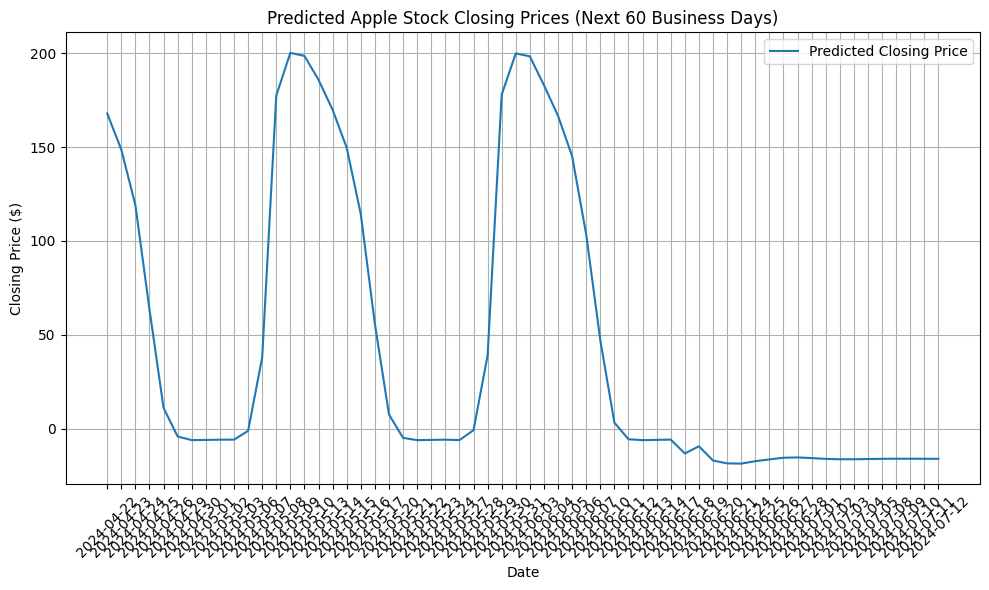

In [ ]:
import matplotlib.pyplot as plt

# Use the predicted_data DataFrame from your previous code

# Extract the predicted closing prices and dates
predicted_prices = predicted_data["Predicted Close"]
prediction_dates = predicted_data.index

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(prediction_dates, predicted_prices, label='Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Predicted Apple Stock Closing Prices (Next 60 Business Days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
